# Problem Description

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

<u>As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not</u>

In [1]:
# Imported required packages for analysis and model creation.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
#imported data using pandas library
train_df = pd.read_csv('data/train.csv')

In [4]:
# One glance at imported data set
train_df.head(10)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.000000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.000000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.880000,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.000000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.000000,36,0
5,5959,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,THAILAND,25.000000,0.000000,38,0
6,6031,EPX,Travel Agency,Online,Cancellation Plan,215,UNITED KINGDOM,59.000000,0.000000,36,0
7,8394,JZI,Airlines,Online,Basic Plan,31,VIET NAM,22.000000,7.700000,43,0
8,3017,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,CHINA,48.662699,0.000000,36,1
9,8054,C2B,Airlines,Online,Bronze Plan,10,SINGAPORE,23.258824,5.817294,28,1


In [5]:
# finding meta info about loaded dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


## Manchine Learning steps:

    1.Data Pre-Processing & Exploratory Data Analysis
    2.Feature Selection Pipeline
    3.Model Creation
    4.Ensemble Method

#### (A) <u>Data Pre-Processing and Exploratory Data Analysis</u>

In [6]:
# Step 1: finding any missing values and data types

def check_data_missing_columns(dataframe):
    data_missing_columns = [col for col in train_df.columns if train_df[col].isnull().sum() > 0]
    if len(data_missing_columns) == 0:
        print("No Data missing from Dataset.")
    else:
        print("Data missing in columns : ",",".join(data_missing_columns))

In [7]:
# Since Data is not missing now verifying the columns and its type
def get_numeric_and_non_numeric_columns(dataframe):
    numeric_df = dataframe.select_dtypes(include=np.number)
    non_numeric_df = dataframe.select_dtypes(exclude=np.number)
    return numeric_df,non_numeric_df
    
numeric_df, non_numeric_df = get_numeric_and_non_numeric_columns(train_df)

In [8]:
# Numeric Dataframe
list(numeric_df.columns)

['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']

In [9]:
# Non-Numeric Dataframe
non_numeric_df.head(3)

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,EPX,Travel Agency,Online,Cancellation Plan,PHILIPPINES
1,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,THAILAND


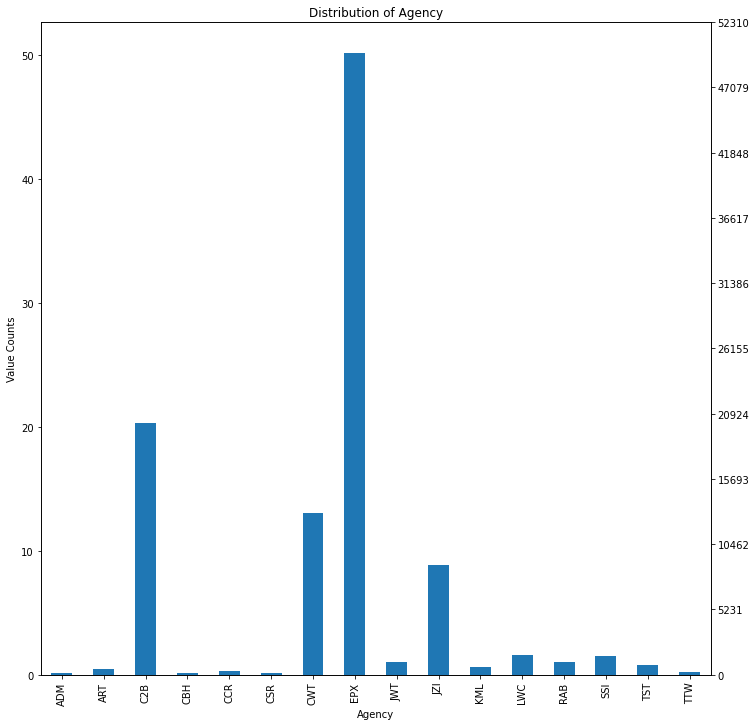

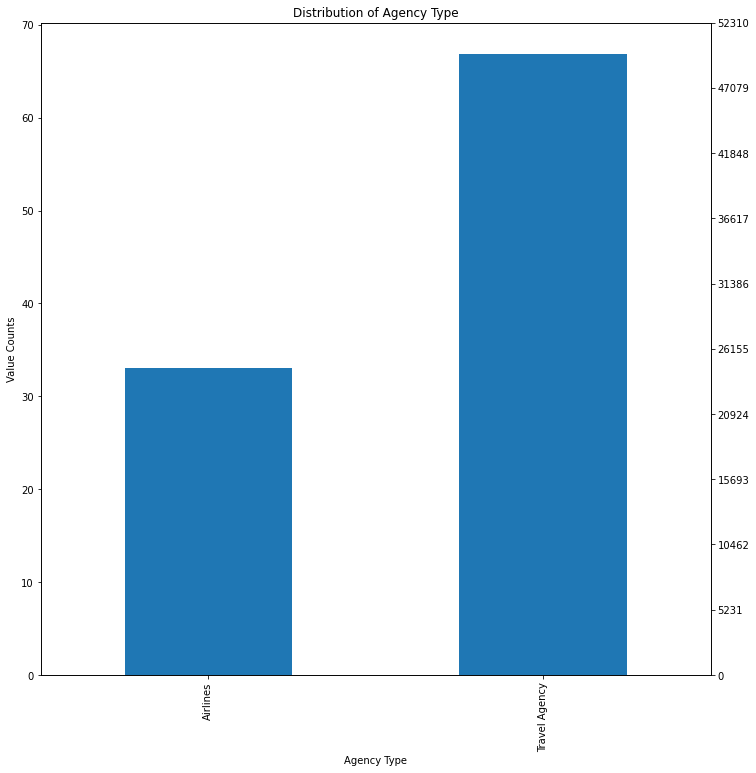

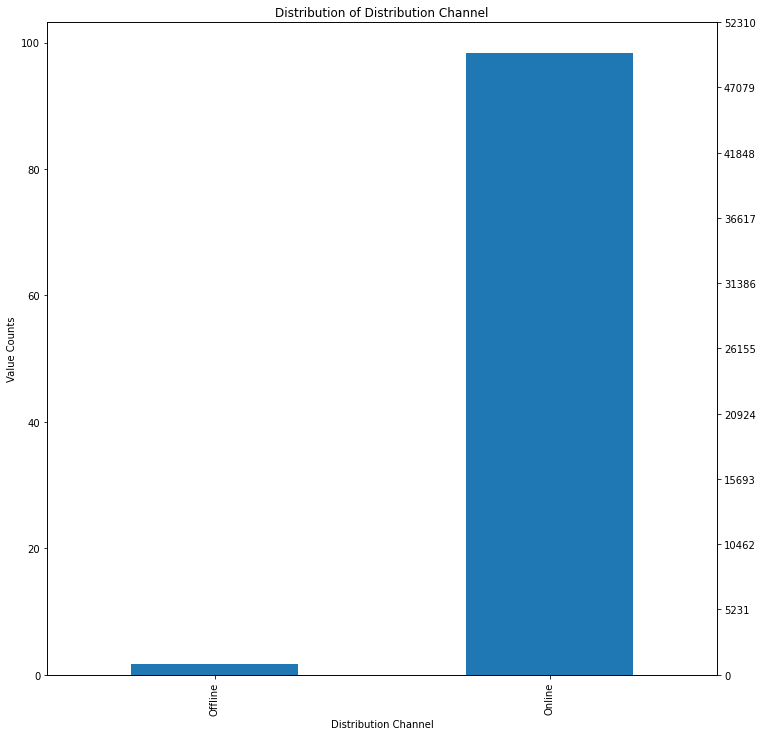

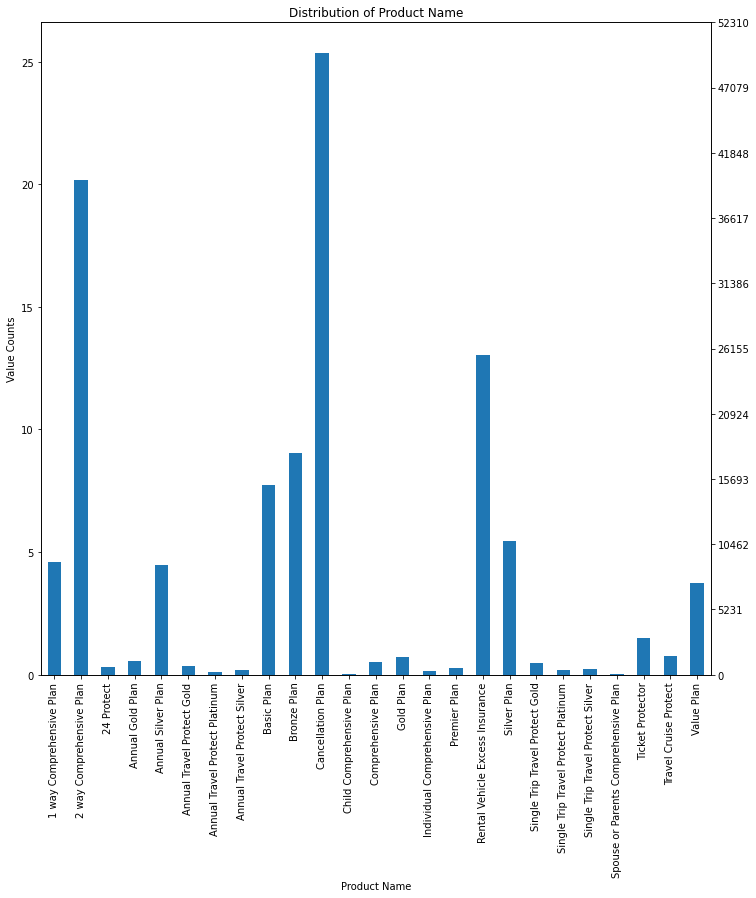

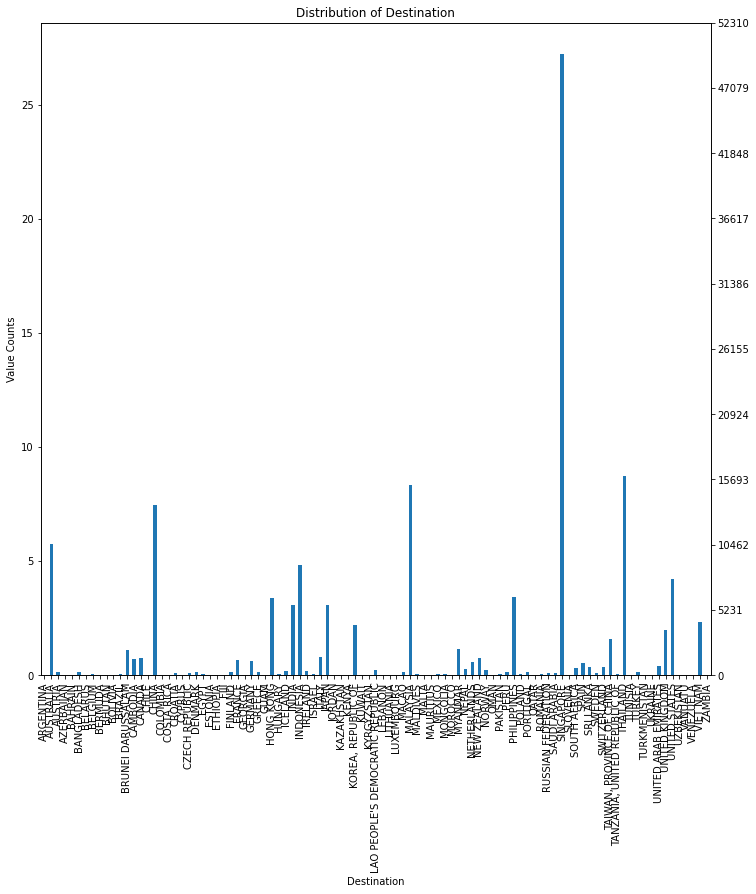

In [10]:
def check_value_counts(categorical_df):
    for col in categorical_df.columns:
        plt.figure(figsize=(12,12))
        plt.title('Distribution of {}'.format(col))
        plt.xlabel(col)
        plt.ylabel('Value Counts')
        ax = (categorical_df[col].value_counts()/len(categorical_df)*100).sort_index().plot(kind="bar", rot=90)
        ax2 = ax.twinx()
        ax2.set_yticks(np.arange(0, 110, 10)*len(categorical_df)/100)
        plt.show()
            
check_value_counts(non_numeric_df)

In [ ]:
# Step 2: Determinig the X & Y for the given dataset.
X = final_df.iloc[:,0:-1]
y = final_df.Claim

#importing model_selection package from sklearn
from sklearn.model_selection import train_test_split as tts

# Determine X_train,X_test,y_train,y_test
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.23,random_state=42)
X_train.head(5)

In [ ]:
def modification_in_destination_feature(non_numeric_df):
    bool_series = non_numeric_df.Destination.value_counts() < 500
    temp_df = pd.DataFrame(bool_series)
    destination_list = list(temp_df[temp_df.Destination==True].index)
    for destination in destination_list:
        non_numeric_df.Destination = non_numeric_df.Destination.replace(destination,'OTHER')
    
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x='Destination', data=non_numeric_df)
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'
    )
    
    return non_numeric_df
    
non_numeric_df = modification_in_destination_feature(non_numeric_df)

In [ ]:
# Step 3: Performing feature scaling on numeric columns before that droping ID column from numeri_df.
def apply_scaling_numeric(numeric_df):
    numeric_df.drop(columns=['ID'],axis=1,inplace=True)
    # Importing Data pre-process library from Sk-Learn
    from sklearn.preprocessing import MinMaxScaler
    
    # initialize MinMaxScaler 
    min_max_scaler = MinMaxScaler(feature_range=(0,1))
    
    # Extracting features names, because after applying fit_transform dataframe converted to ndarray
    numeric_df_columns = numeric_df.columns
    
    #Applying fit transform on numeric dataframe.
    numeric_df = min_max_scaler.fit_transform(numeric_df)

    # Converting from ndarray to dataframe
    return pd.DataFrame(numeric_df,columns=numeric_df_columns)

In [ ]:
numeric_df = apply_scaling_numeric(numeric_df)
numeric_df.head()

In [ ]:
def perform_onehot_encoding(categorical_df):
    for col in categorical_df.columns:
        cat_col = pd.get_dummies(categorical_df[col],drop_first=True)
        categorical_df = categorical_df.drop(col,axis=1)
        categorical_df = pd.concat([cat_col,categorical_df],axis=1)
    return categorical_df

non_numeric_df = perform_onehot_encoding(non_numeric_df)

In [ ]:
non_numeric_df.head()

In [ ]:
def generate_final_df(non_numeric_df,numeric_df):
    return pd.concat([non_numeric_df,numeric_df],axis=1)

final_df = generate_final_df(non_numeric_df,numeric_df)
print(len(final_df.columns))

## Applying Random Forest Model

In [ ]:
def apply_random_forest():
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score
    from sklearn.model_selection import GridSearchCV
    
    #Create a Gaussian Classifier
    parameters = {'max_depth': [10, 50, 100, 200 ,300, 500], 'n_estimators' :[40,50,70,90]}
    clftree = RandomForestClassifier(class_weight='balanced')
    clf = GridSearchCV(clftree,parameters,cv=4, scoring='roc_auc',return_train_score=True)
    tab = pd.DataFrame(clf.cv_results_)
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best n estimators: ', clf.best_estimator_.n_estimators)
    #return clf


#Train the model using the training sets y_pred=clf.predict(X_test)
#clf = apply_random_forest()
#clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
def get_metrics_for_model(y_test,y_pred):
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
get_metrics_for_model(y_test,y_pred)

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
def run_test_df(test_dataframe):
    check_data_missing_columns(test_dataframe)
    numeric_df,non_numeric_df = get_numeric_and_non_numeric_columns(test_dataframe)
    #check_value_counts(non_numeric_df)
    #non_numeric_df = modification_in_destination_feature(non_numeric_df)
    numeric_df = apply_scaling_numeric(numeric_df)
    non_numeric_df = perform_onehot_encoding(non_numeric_df)
    return generate_final_df(non_numeric_df,numeric_df)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
sample_submission.columns

In [ ]:
sample_submission.Claim = clf.predict(run_test_df(test_df))

In [ ]:
sample_submission.Claim.value_counts()

In [ ]:
sample_submission.to_csv('results.csv')